In [1]:
#---------------------------------------------------------LIMPIEZA DE DATOS--------------------
#IMPORTAR LIBRERIAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import missingno as mn
import seaborn as sb
from scipy.stats import chi2_contingency
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import random



#Importar datos desde el archivo de CSV
archivo = "C:/Users/natal/OneDrive/Documentos/U/2024-2/Analitica/PROYECTO1/datos.csv"
data = pd.read_csv(archivo)






In [2]:
#tamano de los datos

print(data.shape)


(8760, 14)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

<Axes: >

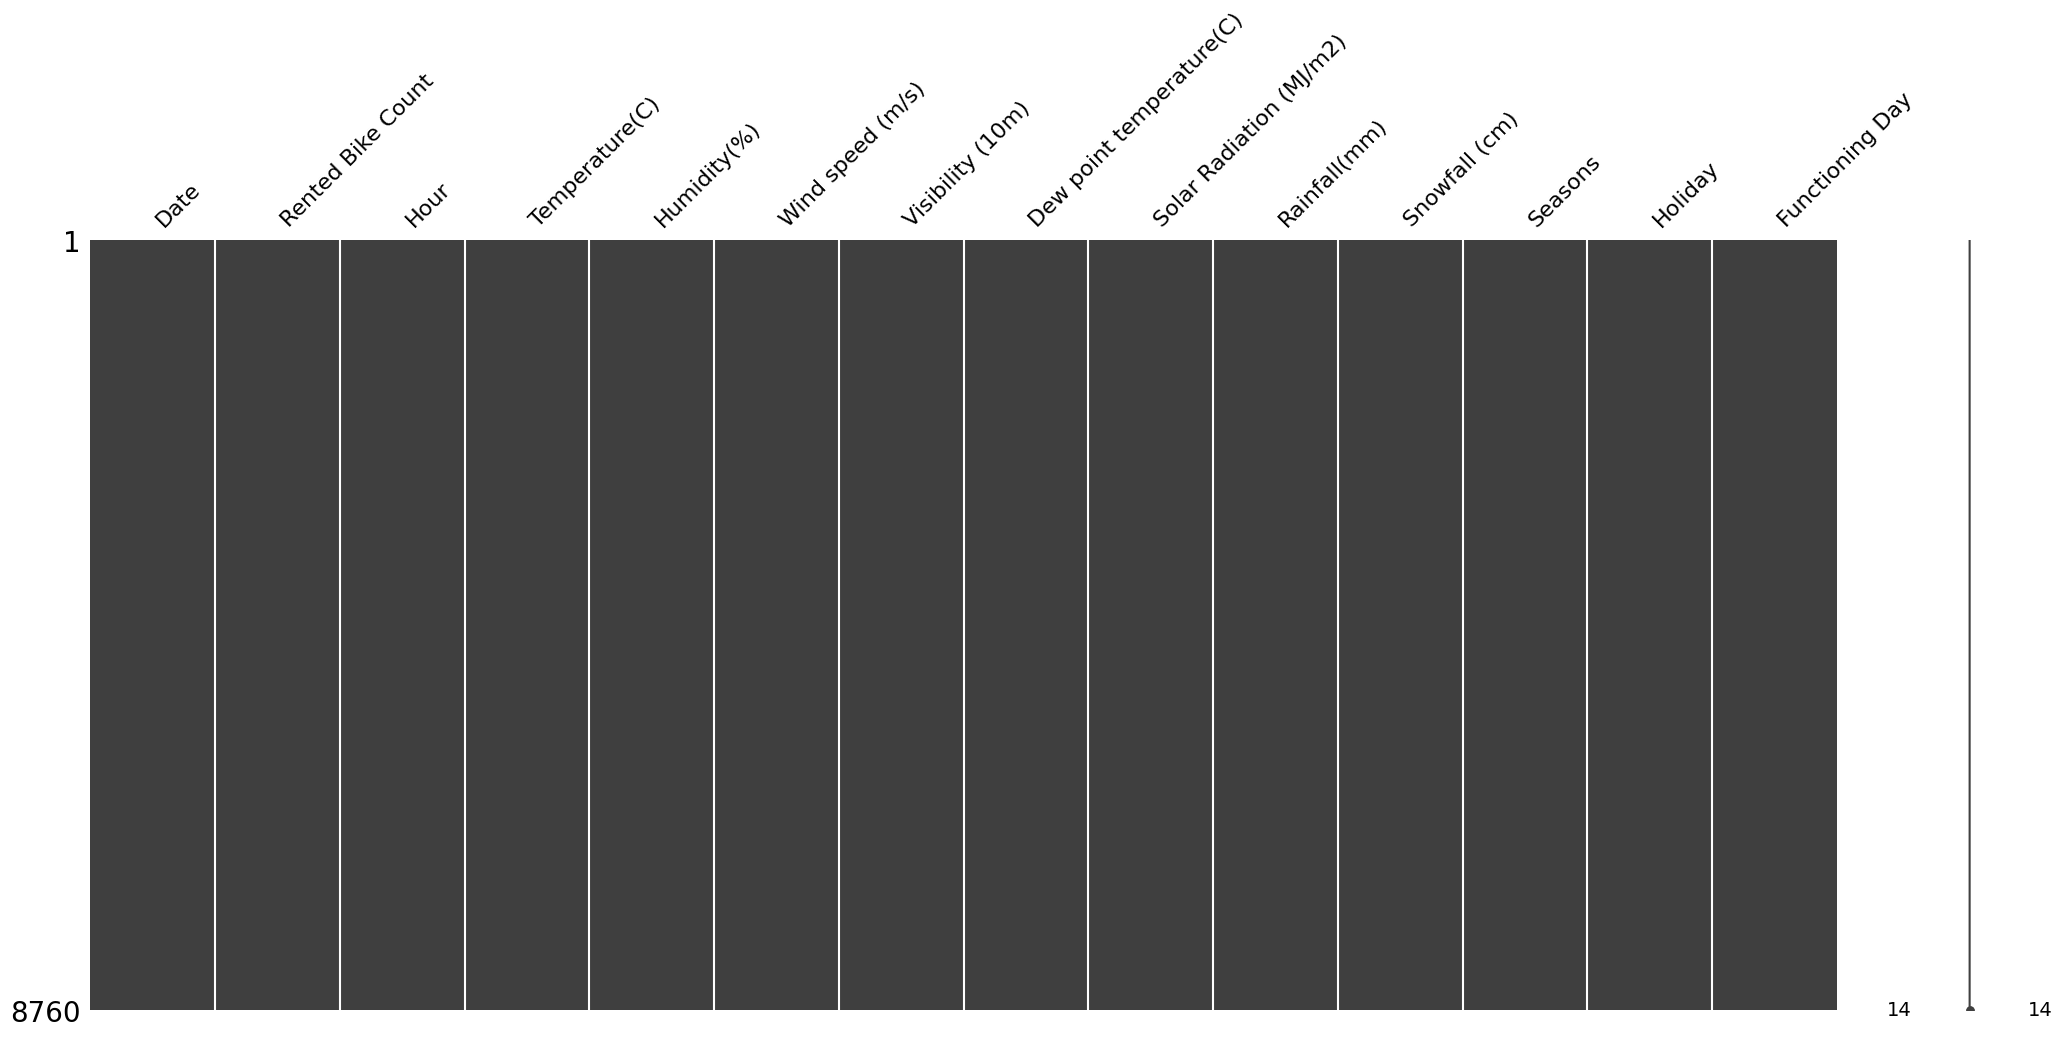

In [5]:
data.info() #ver variables numericas y categoricas


#-------------------------------------------------------------------------------------LIMPIEZA DE DATOS -----------------------------------------------------------------------

# 1. Verificar que NO HAY DATOS FALTANTES. SE CUMPLE YA QUE CADA VARIABLE (COLUMNA) TIENE 8760 FILAS 

mn.matrix(data)



In [4]:

# 2. VERIFICAR QUE  seasons solo tenga 4 subniveles, holiday 2, function day 2

cols_cat= ['Seasons','Holiday', 'Functioning Day']
for col in cols_cat:
    print(f' Columna {col}: {data[col].nunique()} subniveles')

# VERIFICAR QUE LAS VARIABLES NUMERICAS TENGAN MAS DE UN VALOR, ES DECIR, QUE TODOS LOS DATOS DE UNA COLUMNA NO TENGAN UN MISMO VALOR. 
# SE CUMPLE YA QUE LA DESVIACION ESTAMDAR DE TODAS LAS COLUMMNAS ES DIFENTE DE 0
data.describe()






 Columna Seasons: 4 subniveles
 Columna Holiday: 2 subniveles
 Columna Functioning Day: 2 subniveles


,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [6]:
#VERIFICAR SI HAY FILAS REPETIDAS. NO HUBIERON FILAS REPETIDAS

print (f'Tamano del set antes de eliminar filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamano del set despues de eliminar filas repetidas: {data.shape}')

Tamano del set antes de eliminar filas repetidas: (8760, 14)
Tamano del set despues de eliminar filas repetidas: (8760, 14)


In [7]:
#eliminar datos redundantes. Nos interesa saber la demanda cuando esta abierto entonces eliminamos los datos cuando funcion day es no. 
# Eliminar filas donde 'Functioning Day' sea 'No'
data = data[data['Functioning Day'] != 'No']

# Eliminar la columna 'Functioning Day'
data = data.drop(columns=['Functioning Day'])


# Verificar los cambios
data.shape


(8465, 13)

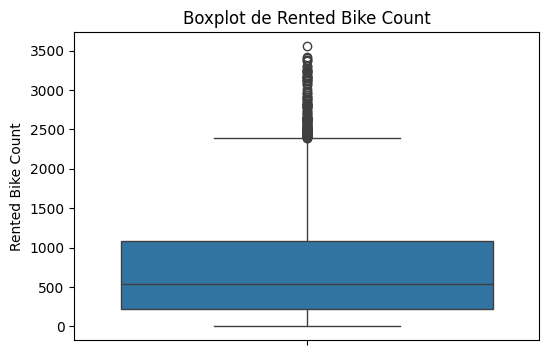

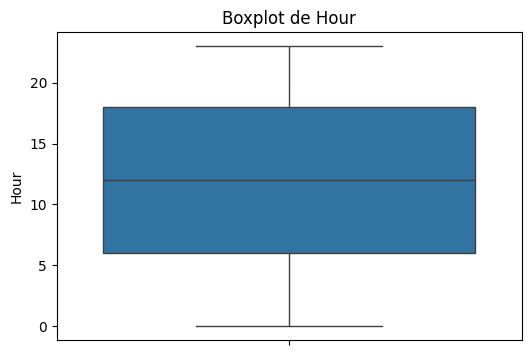

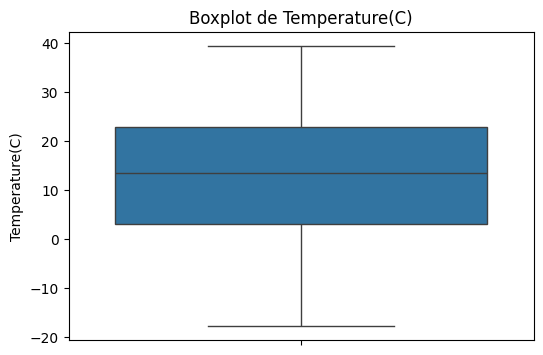

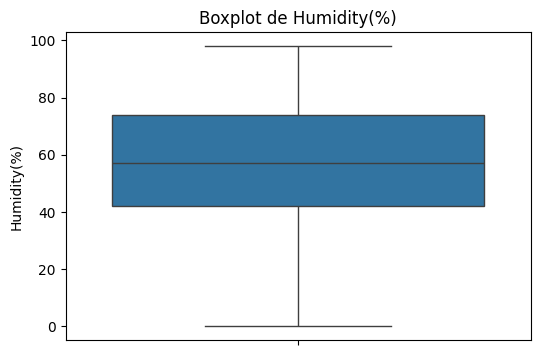

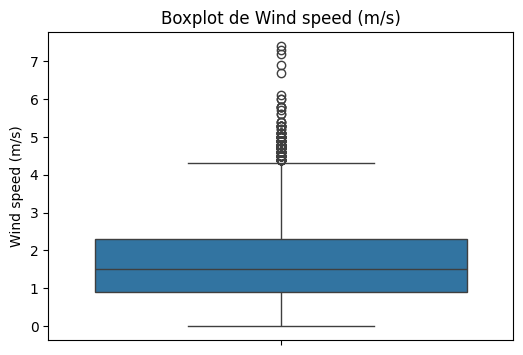

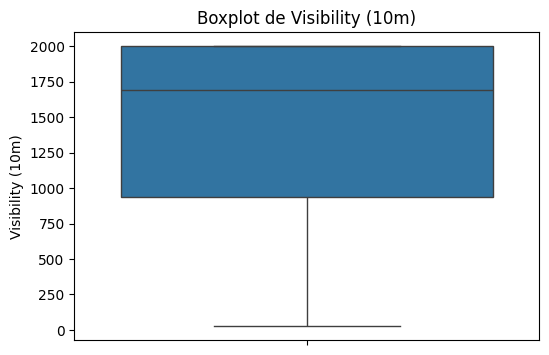

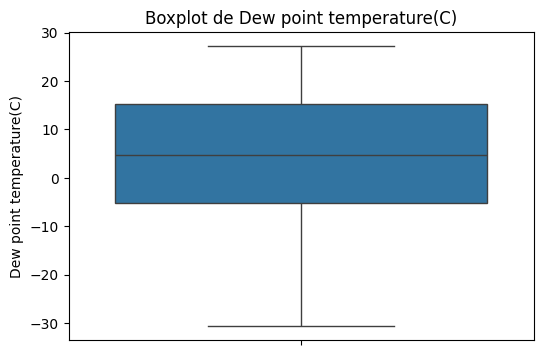

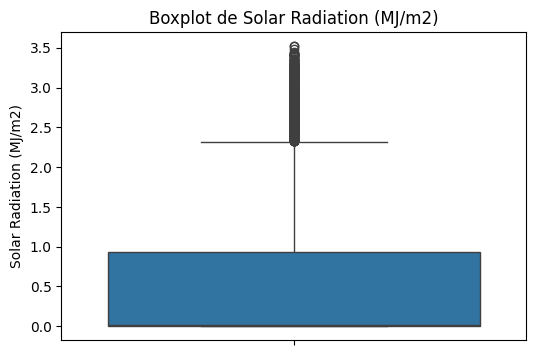

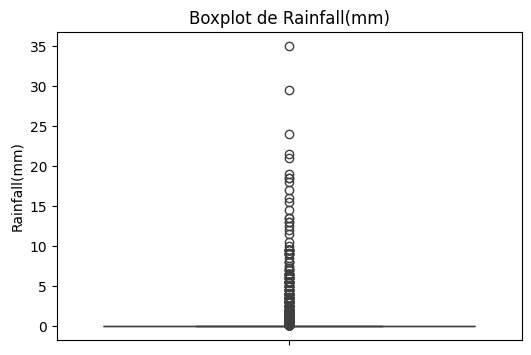

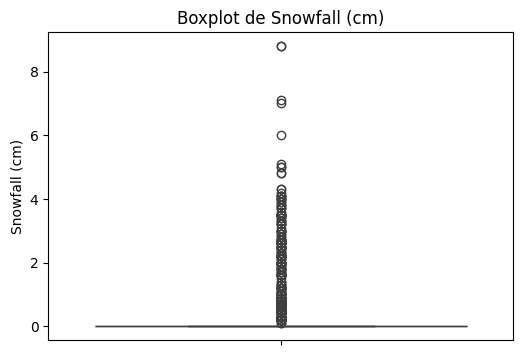

In [8]:
#VERIFICAR SI HAY OUTLIERS EN VARIABLES NUMERICAS
cols_num = [
    'Rented Bike Count', 
    'Hour', 
    'Temperature(C)', 
    'Humidity(%)', 
    'Wind speed (m/s)', 
    'Visibility (10m)', 
    'Dew point temperature(C)', 
    'Solar Radiation (MJ/m2)', 
    'Rainfall(mm)', 
    'Snowfall (cm)'
]
for variable in cols_num:
    plt.figure(figsize=(6, 4))  # Establecer el tamaño de cada gráfico
    sns.boxplot(y=data[variable])  # Crear el boxplot para la variable actual
    plt.title(f'Boxplot de {variable}')  # Título para cada gráfico
    plt.show()  # Mostrar el gráfico



    #A pesar de qe se ven outliers en los bloxpots, despues de buscar los rangos de valores de cada variable, creemos que no es necesario eliminar 
    #ningun valor pues pudieron ser situaciones puntuales que entran en los rangos normales de cada variable. 

In [9]:
#conversion de la columna Date a formato fecha d/m/a

data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')
data.info()





<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8465 non-null   datetime64[ns]
 1   Rented Bike Count         8465 non-null   int64         
 2   Hour                      8465 non-null   int64         
 3   Temperature(C)            8465 non-null   float64       
 4   Humidity(%)               8465 non-null   int64         
 5   Wind speed (m/s)          8465 non-null   float64       
 6   Visibility (10m)          8465 non-null   int64         
 7   Dew point temperature(C)  8465 non-null   float64       
 8   Solar Radiation (MJ/m2)   8465 non-null   float64       
 9   Rainfall(mm)              8465 non-null   float64       
 10  Snowfall (cm)             8465 non-null   float64       
 11  Seasons                   8465 non-null   object        
 12  Holiday                  

In [10]:
print(data.columns)

# Convertir las columnas categóricas en variables dummy
data = pd.get_dummies(data, columns=['Seasons', 'Holiday'], drop_first=True)


# Verificar el DataFrame actualizado
print(data.columns)


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday'],
      dtype='object')
Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday'],
      dtype='object')


In [11]:
# Mostrar el DataFrame resultante con solo las dummies
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8465 non-null   datetime64[ns]
 1   Rented Bike Count         8465 non-null   int64         
 2   Hour                      8465 non-null   int64         
 3   Temperature(C)            8465 non-null   float64       
 4   Humidity(%)               8465 non-null   int64         
 5   Wind speed (m/s)          8465 non-null   float64       
 6   Visibility (10m)          8465 non-null   int64         
 7   Dew point temperature(C)  8465 non-null   float64       
 8   Solar Radiation (MJ/m2)   8465 non-null   float64       
 9   Rainfall(mm)              8465 non-null   float64       
 10  Snowfall (cm)             8465 non-null   float64       
 11  Seasons_Spring            8465 non-null   bool          
 12  Seasons_Summer           

In [13]:
#guardar los cambios en un nuevo csv
data.to_csv("C:/Users/natal/OneDrive/Documentos/U/2024-2/Analitica/PROYECTO1/datoslimpios.csv", index=False)